In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import calendar
import math

In [2]:
df = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/acoustic_sources.csv')
df

,cluster_Centers,axis,date,persent_pts,angle_start
0,58.796045,x,2021-04-01,39.675456,90
1,-2.758616,x,2021-04-01,39.675456,90
2,-60.277800,x,2021-04-01,39.675456,90
3,-141.484200,x,2021-04-01,39.675456,90
4,120.880130,x,2021-04-01,39.675456,90
...,...,...,...,...,...
3867,61.912043,y,2021-09-30 00:00:00,37.353171,101
3868,46.545744,y,2021-09-30 00:00:00,37.353171,101
3869,12.797158,y,2021-09-30 00:00:00,37.353171,101
3870,462.517313,y,2021-09-30 00:00:00,37.353171,101


In [3]:
df[df['axis']=='x']['cluster_Centers']

0        58.796045
1        -2.758616
2       -60.277800
3      -141.484200
4       120.880130
           ...    
3862    -37.157306
3863    -95.995336
3864   -234.753574
3865   -107.785788
3866    -26.034010
Name: cluster_Centers, Length: 2084, dtype: float64

In [4]:
df.loc[df['axis']=='x', 'cluster_Centers']

0        58.796045
1        -2.758616
2       -60.277800
3      -141.484200
4       120.880130
           ...    
3862    -37.157306
3863    -95.995336
3864   -234.753574
3865   -107.785788
3866    -26.034010
Name: cluster_Centers, Length: 2084, dtype: float64

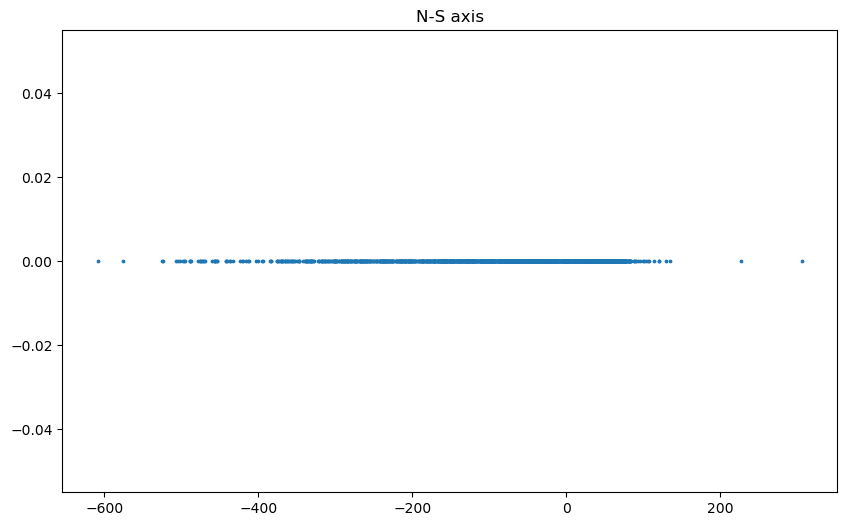

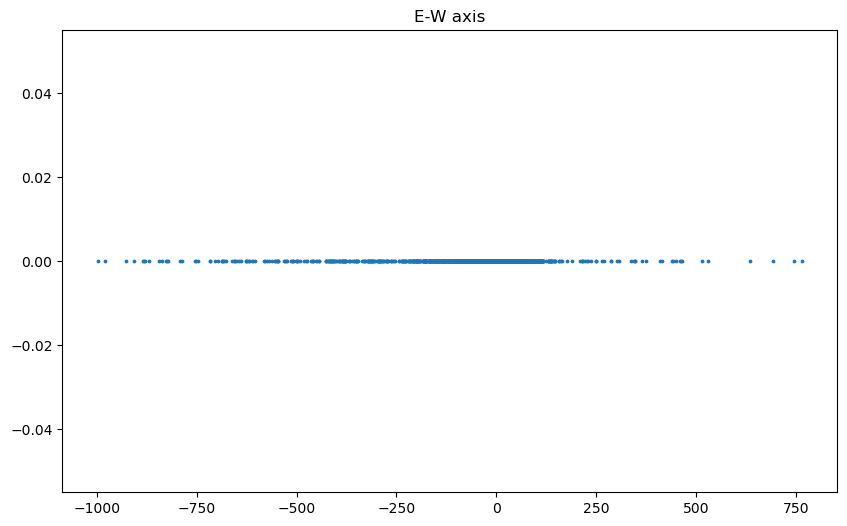

In [5]:
acoustic_sources_x = df.loc[df['axis']=='x', 'cluster_Centers']
acoustic_sources_y = df.loc[df['axis']=='y', 'cluster_Centers']

plt.figure(figsize=(10, 6))
# plt.subplot(1,2,1)
plt.scatter(acoustic_sources_x, np.zeros(len(acoustic_sources_x)), s=3)
plt.title('N-S axis')
plt.show()
# plt.subplot(1,2,2)
plt.figure(figsize=(10, 6))
plt.scatter(acoustic_sources_y, np.zeros(len(acoustic_sources_y)), s=3)
plt.title('E-W axis')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cluster_Centers  3872 non-null   float64
 1   axis             3872 non-null   object 
 2   date             3872 non-null   object 
 3   persent_pts      3872 non-null   float64
 4   angle_start      3872 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 151.4+ KB


In [7]:
df_soc = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/acoustic_sources.csv')
df_soc.head(10)

,cluster_Centers,axis,date,persent_pts,angle_start
0,58.796045,x,2021-04-01,39.675456,90
1,-2.758616,x,2021-04-01,39.675456,90
2,-60.277800,x,2021-04-01,39.675456,90
3,-141.484200,x,2021-04-01,39.675456,90
4,120.880130,x,2021-04-01,39.675456,90
5,5.613491,y,2021-04-01 00:00:00,69.389866,93
6,-29.999197,y,2021-04-01 00:00:00,69.389866,93
7,-46.735915,y,2021-04-01 00:00:00,69.389866,93
8,-62.658926,y,2021-04-01 00:00:00,69.389866,93
9,-101.950344,y,2021-04-01 00:00:00,69.389866,93


In [8]:
df_soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cluster_Centers  3872 non-null   float64
 1   axis             3872 non-null   object 
 2   date             3872 non-null   object 
 3   persent_pts      3872 non-null   float64
 4   angle_start      3872 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 151.4+ KB


In [9]:
df_soc.loc[:4, 'date'] = pd.to_datetime(df_soc.loc[:4, 'date'], format="%Y-%m-%d")
df_soc.loc[5:, 'date'] = pd.to_datetime(df_soc.loc[5:, 'date'], format='%Y-%m-%d %H:%M:%S')
df_soc['date'] = pd.to_datetime(df_soc['date'])

In [10]:
df_soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cluster_Centers  3872 non-null   float64       
 1   axis             3872 non-null   object        
 2   date             3872 non-null   datetime64[ns]
 3   persent_pts      3872 non-null   float64       
 4   angle_start      3872 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 151.4+ KB


In [11]:
df_soc

,cluster_Centers,axis,date,persent_pts,angle_start
0,58.796045,x,2021-04-01,39.675456,90
1,-2.758616,x,2021-04-01,39.675456,90
2,-60.277800,x,2021-04-01,39.675456,90
3,-141.484200,x,2021-04-01,39.675456,90
4,120.880130,x,2021-04-01,39.675456,90
...,...,...,...,...,...
3867,61.912043,y,2021-09-30,37.353171,101
3868,46.545744,y,2021-09-30,37.353171,101
3869,12.797158,y,2021-09-30,37.353171,101
3870,462.517313,y,2021-09-30,37.353171,101


In [45]:
df_soc_x =  df_soc[df_soc['axis'] == 'x']
df_soc_y =  df_soc[df_soc['axis'] == 'y']

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


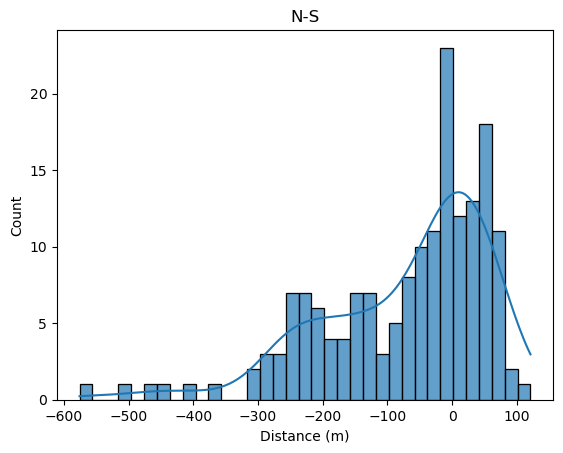

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


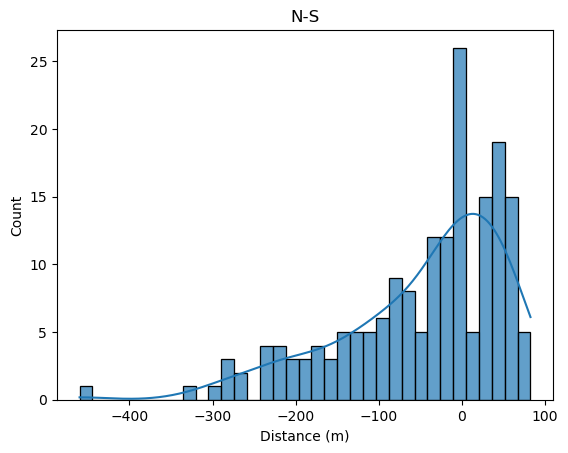

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


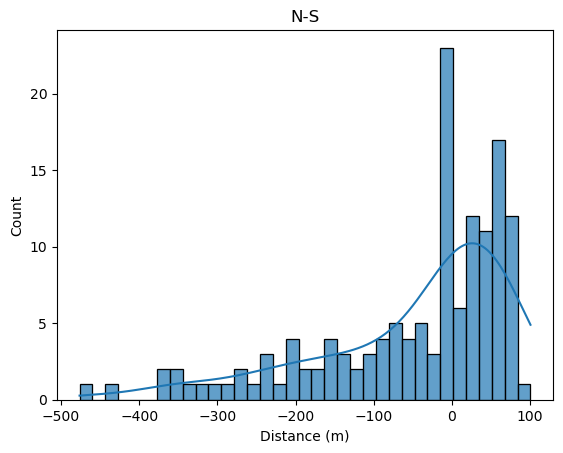

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


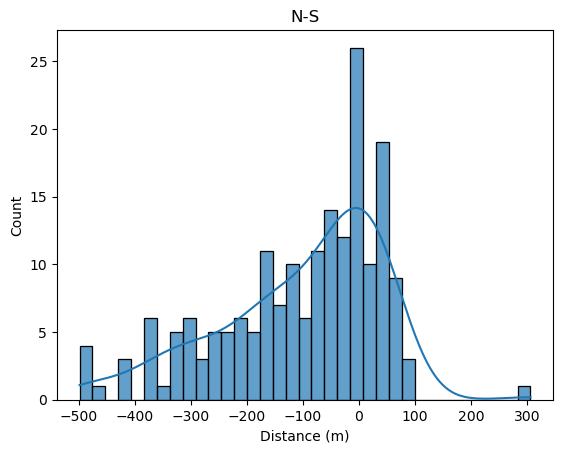

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


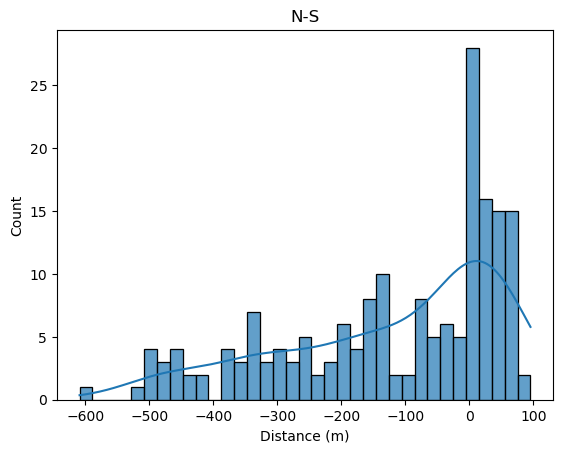

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


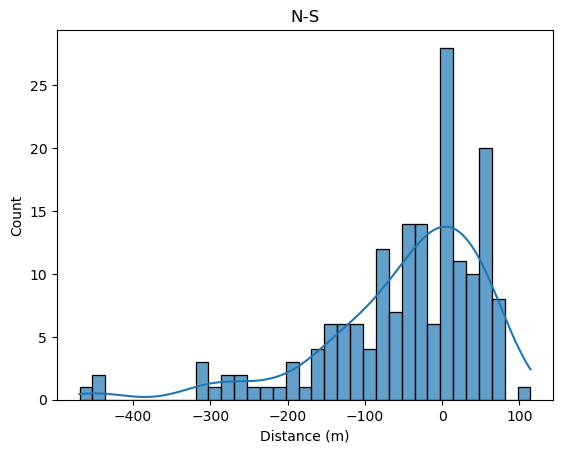

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


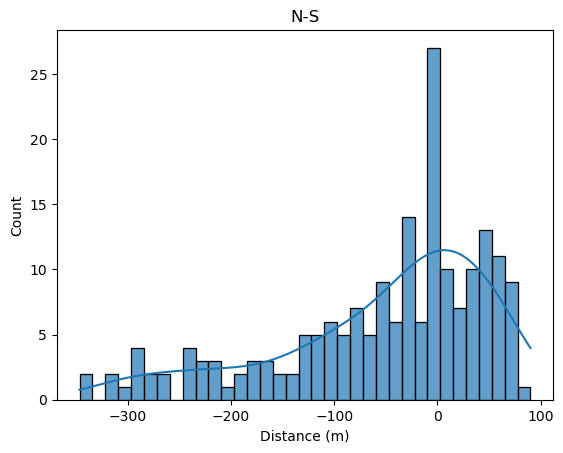

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


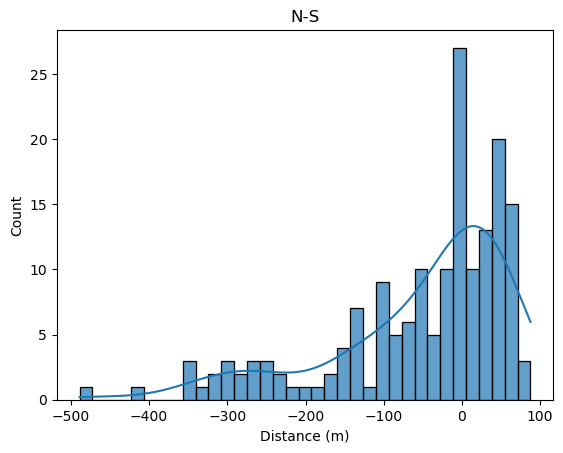

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


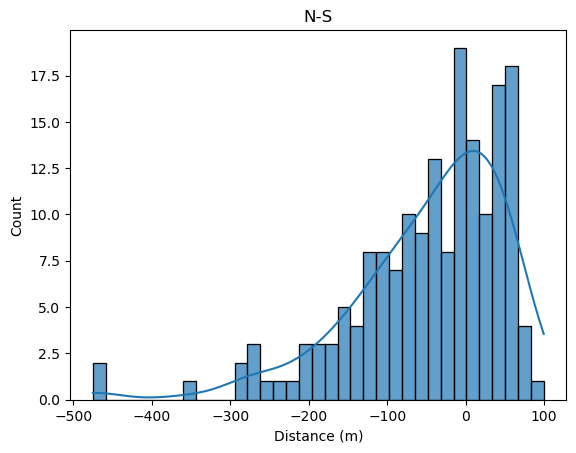

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


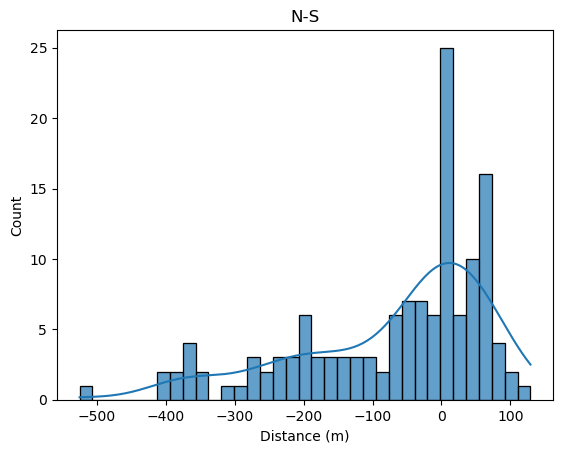

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


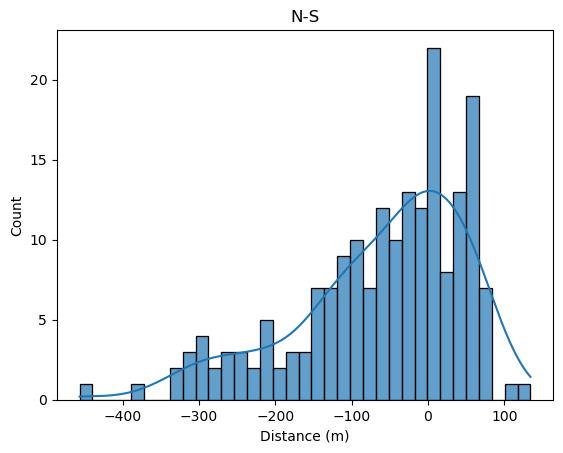

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


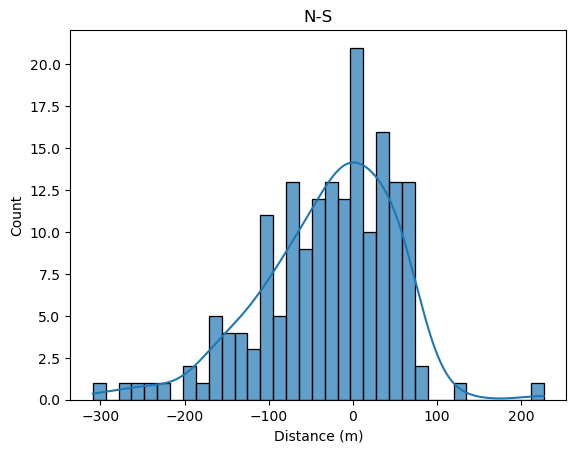

In [46]:
df_mon_x = df_soc_x.groupby(df_soc_x['date'].dt.month)

for mon in df_soc_x['date'].dt.month.unique():
    df_ = df_mon_x.get_group(mon)
    # plt.scatter(df_['cluster_Centers'], np.zeros(len(df_['cluster_Centers'])), s=2)
    sns.histplot(df_['cluster_Centers'], bins=35, edgecolor='black', alpha=0.7, kde=True)
    plt.title('N-S')
    plt.xlabel('Distance (m)')
    plt.savefig(f'{calendar.month_name[mon]}_NS.png')
    plt.show()

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


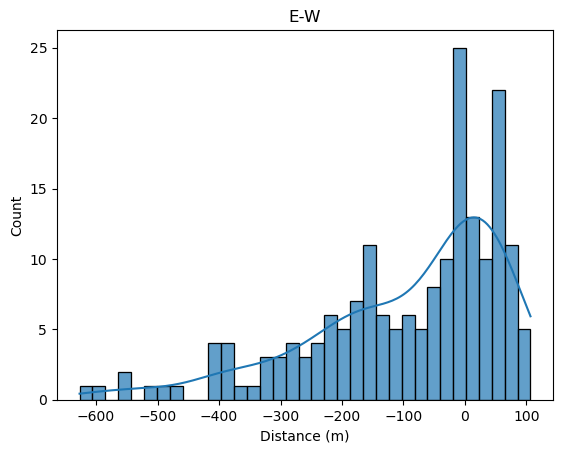

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


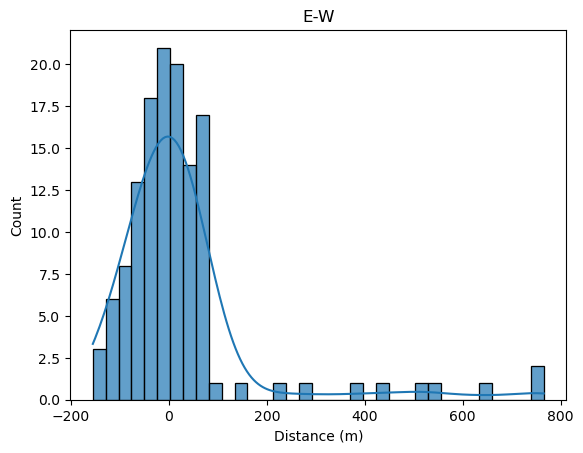

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


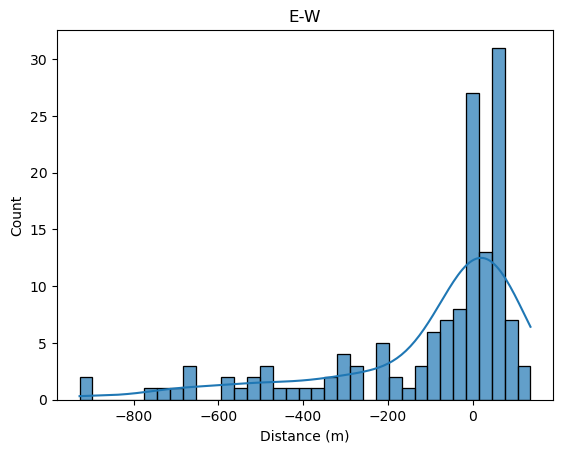

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


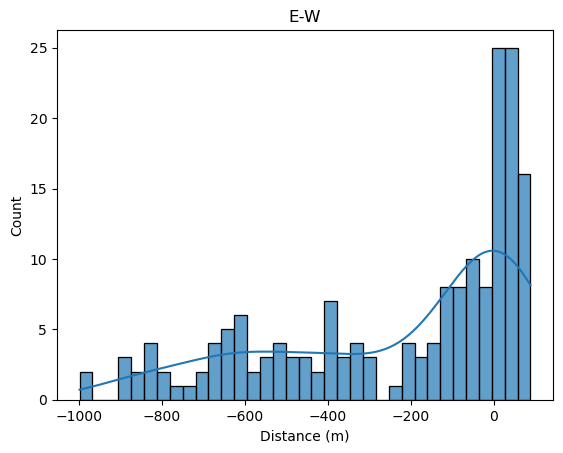

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


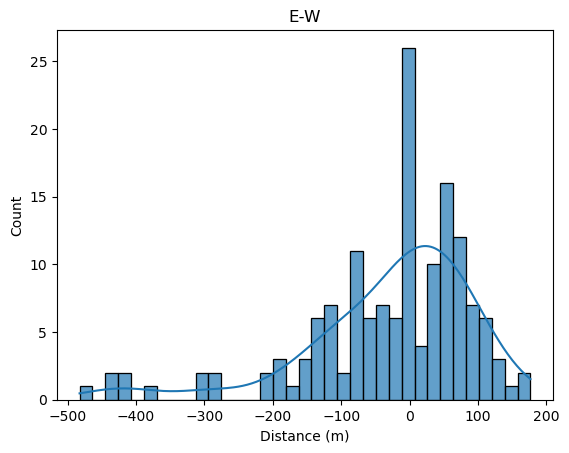

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


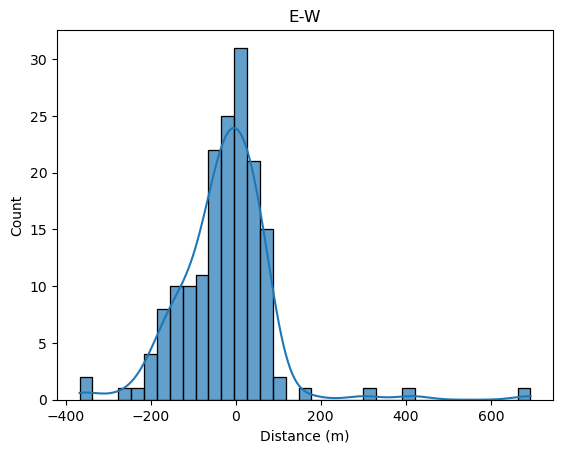

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


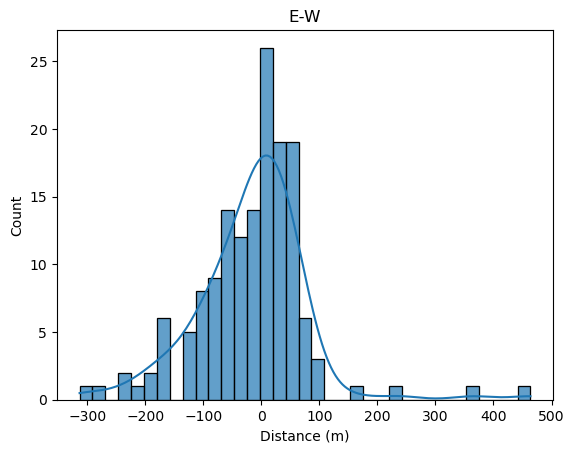

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


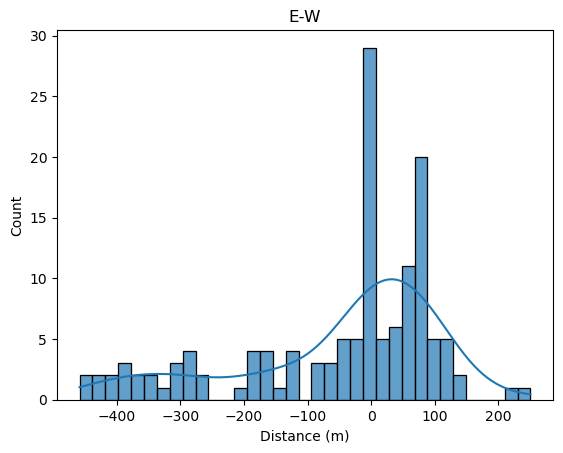

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


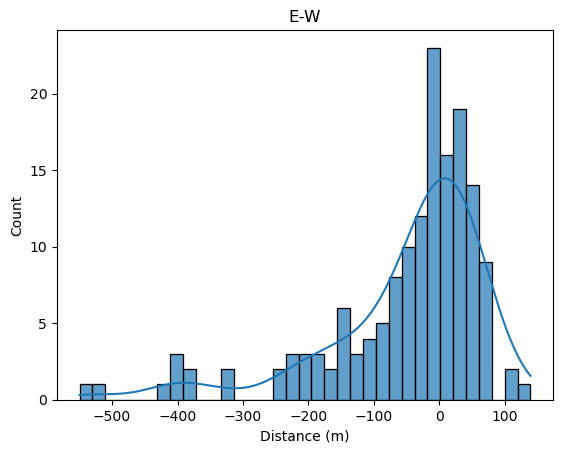

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


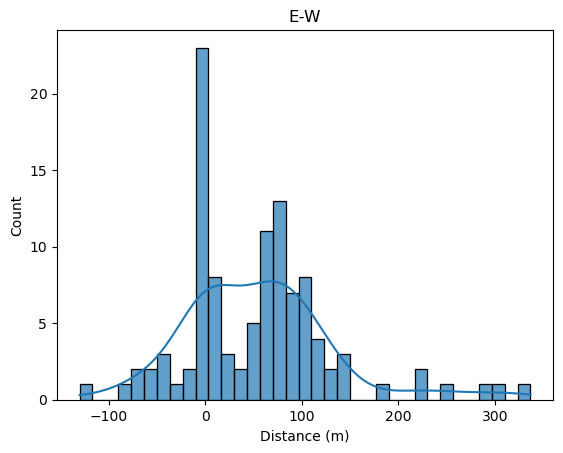

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


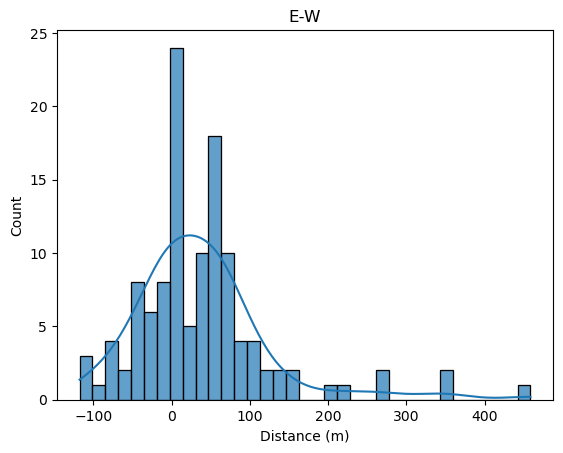

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


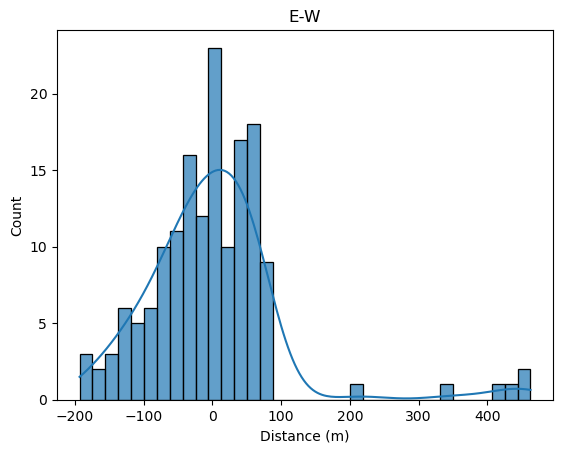

In [47]:
df_mon_y = df_soc_y.groupby(df_soc_y['date'].dt.month)

for mon in df_soc_y['date'].dt.month.unique():
    df_ = df_mon_y.get_group(mon)
    # plt.scatter(df_['cluster_Centers'], np.zeros(len(df_['cluster_Centers'])), s=2)
    sns.histplot(df_['cluster_Centers'], bins=35, edgecolor='black', alpha=0.7, kde=True)
    plt.title('E-W')
    plt.xlabel('Distance (m)')
    plt.savefig(f'{calendar.month_name[mon]}_EW.png')
    plt.show()

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

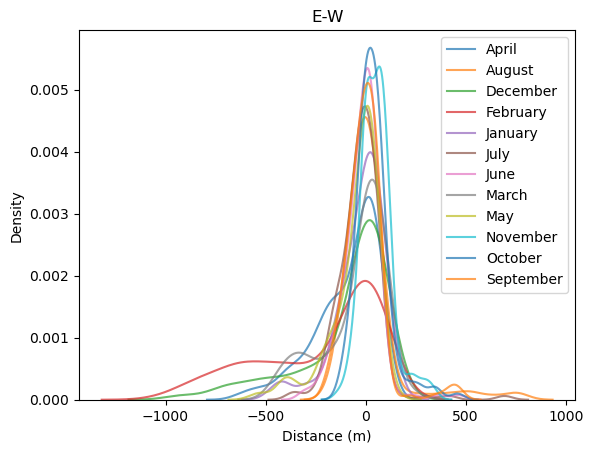

In [61]:
df_mon_y = df_soc_y.groupby(df_soc_y['date'].dt.month)

for mon in df_soc_y['date'].dt.month.unique():
    df_ = df_mon_y.get_group(mon)
    # plt.scatter(df_['cluster_Centers'], np.zeros(len(df_['cluster_Centers'])), s=2)
    sns.kdeplot(df_['cluster_Centers'], alpha=0.7, label=f'{calendar.month_name[mon]}')
    plt.title(f'E-W')
    plt.xlabel('Distance (m)')
plt.legend()
plt.savefig(f'2021_EW_ked.png')
plt.show()

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

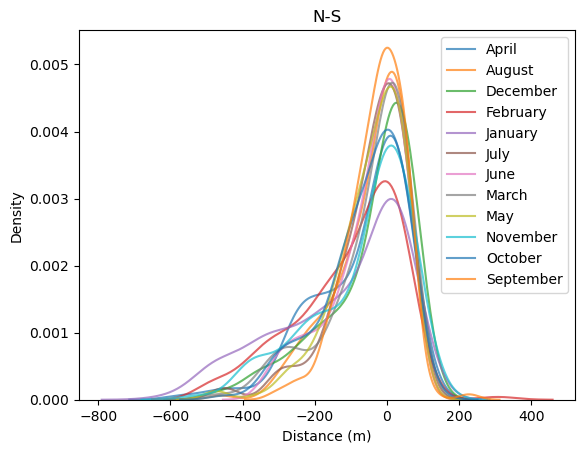

In [60]:
df_mon_x = df_soc_x.groupby(df_soc_x['date'].dt.month)

for mon in df_soc_x['date'].dt.month.unique():
    df_ = df_mon_x.get_group(mon)
    # plt.scatter(df_['cluster_Centers'], np.zeros(len(df_['cluster_Centers'])), s=2)
    sns.kdeplot(df_['cluster_Centers'], alpha=0.7, label=f'{calendar.month_name[mon]}')
  
plt.xlabel('Distance (m)')
plt.title('N-S')
plt.legend()
plt.savefig(f'2021_NS_ked.png')
plt.show()

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/acoustic_sources.csv')

# Ensure the 'date' column is in datetime format
df.loc[:4, 'date'] = pd.to_datetime(df.loc[:4, 'date'], format="%Y-%m-%d")
df.loc[5:, 'date'] = pd.to_datetime(df.loc[5:, 'date'], format='%Y-%m-%d %H:%M:%S')
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the date
df['month'] = df['date'].dt.month

# Define a color palette
palette = sns.color_palette("hsv", 12)

plt.figure(figsize=(15, 10))

# Loop through each month and plot
for month in range(1, 13):
    monthly_data = df[df['month'] == month]['value']
    sns.histplot(monthly_data, kde=True, color=palette[month-1], label=f'Month {month}', bins=30, kde_kws={'bw_adjust': 0.5}, alpha=0.6)

plt.legend(title='Month')
plt.title('Histogram with KDE for Each Month')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


KeyError: 'value'

<Figure size 1500x1000 with 0 Axes>

In [21]:
df['month'].unique()

array([ 4,  8, 12,  2,  1,  7,  6,  3,  5, 11, 10,  9], dtype=int32)

In [22]:
df

,cluster_Centers,axis,date,persent_pts,angle_start,month
0,58.796045,x,2021-04-01,39.675456,90,4
1,-2.758616,x,2021-04-01,39.675456,90,4
2,-60.277800,x,2021-04-01,39.675456,90,4
3,-141.484200,x,2021-04-01,39.675456,90,4
4,120.880130,x,2021-04-01,39.675456,90,4
...,...,...,...,...,...,...
3867,61.912043,y,2021-09-30,37.353171,101,9
3868,46.545744,y,2021-09-30,37.353171,101,9
3869,12.797158,y,2021-09-30,37.353171,101,9
3870,462.517313,y,2021-09-30,37.353171,101,9


In [23]:
df_x = df[df['axis']=='x']
df_y = df[df['axis']=='y']
print(df_x)
print(df_y)

      cluster_Centers axis       date  persent_pts  angle_start  month
0           58.796045    x 2021-04-01    39.675456           90      4
1           -2.758616    x 2021-04-01    39.675456           90      4
2          -60.277800    x 2021-04-01    39.675456           90      4
3         -141.484200    x 2021-04-01    39.675456           90      4
4          120.880130    x 2021-04-01    39.675456           90      4
...               ...  ...        ...          ...          ...    ...
3862       -37.157306    x 2021-09-30    54.669647           90      9
3863       -95.995336    x 2021-09-30    54.669647           90      9
3864      -234.753574    x 2021-09-30    54.669647           90      9
3865      -107.785788    x 2021-09-30    54.669647           90      9
3866       -26.034010    x 2021-09-30    54.669647           90      9

[2084 rows x 6 columns]
      cluster_Centers axis       date  persent_pts  angle_start  month
5            5.613491    y 2021-04-01    69.389866  

In [30]:
df_x[df_x['month']==6]['cluster_Centers'].describe()

count    192.000000
mean     -52.942143
std      102.873135
min     -346.684609
25%     -103.325982
50%      -24.975041
75%       22.343788
max       90.188255
Name: cluster_Centers, dtype: float64

In [37]:
df = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/acoustic_sources.csv')

# Ensure the 'date' column is in datetime format
df.loc[:4, 'date'] = pd.to_datetime(df.loc[:4, 'date'], format="%Y-%m-%d")
df.loc[5:, 'date'] = pd.to_datetime(df.loc[5:, 'date'], format='%Y-%m-%d %H:%M:%S')
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the date
df['month'] = df['date'].dt.month

df_x = df[df['axis']=='x']
df_y = df[df['axis']=='y']

for month in range(1, 13):
    monthly_data = df_x[df_x['month'] == month]
    print(f'\n month: {month}')
    print(monthly_data['cluster_Centers'].describe())
    print()


 month: 1
count    183.000000
mean    -121.565279
std      171.350288
min     -608.875944
25%     -246.516387
50%      -63.807280
75%       18.973209
max       95.652980
Name: cluster_Centers, dtype: float64


 month: 2
count    189.000000
mean    -103.814526
std      144.796690
min     -498.479887
25%     -185.560394
50%      -62.540623
75%        1.374852
max      306.309675
Name: cluster_Centers, dtype: float64


 month: 3
count    171.000000
mean     -53.285113
std      116.345626
min     -488.870808
25%      -99.577373
50%       -1.495370
75%       27.982631
max       87.532132
Name: cluster_Centers, dtype: float64


 month: 4
count    173.000000
mean     -73.031650
std      128.999792
min     -575.648074
25%     -155.503159
50%      -25.341245
75%       24.190325
max      120.880130
Name: cluster_Centers, dtype: float64


 month: 5
count    175.000000
mean     -47.884689
std       99.730989
min     -475.312706
25%      -98.859417
50%      -27.527443
75%       28.568329
max      

In [38]:
import pandas as pd

# Read the data
df = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/acoustic_sources.csv')

# Ensure the 'date' column is in datetime format
df.loc[:4, 'date'] = pd.to_datetime(df.loc[:4, 'date'], format="%Y-%m-%d")
df.loc[5:, 'date'] = pd.to_datetime(df.loc[5:, 'date'], format='%Y-%m-%d %H:%M:%S')
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the date
df['month'] = df['date'].dt.month

df_x = df[df['axis'] == 'x']
df_y = df[df['axis'] == 'y']

# Dictionary to hold the stats for LaTeX table
monthly_stats = {
    'Month': [],
    'Mean': [],
    'Std': [],
    'Min': [],
    '25%': [],
    '50%': [],
    '75%': [],
    'Max': []
}

for month in range(1, 13):
    monthly_data = df_x[df_x['month'] == month]
    stats = monthly_data['cluster_Centers'].describe()
    
    monthly_stats['Month'].append(month)
    monthly_stats['Mean'].append(stats['mean'])
    monthly_stats['Std'].append(stats['std'])
    monthly_stats['Min'].append(stats['min'])
    monthly_stats['25%'].append(stats['25%'])
    monthly_stats['50%'].append(stats['50%'])
    monthly_stats['75%'].append(stats['75%'])
    monthly_stats['Max'].append(stats['max'])

# Convert the dictionary to a DataFrame for easier LaTeX conversion
stats_df = pd.DataFrame(monthly_stats)

# Print LaTeX table
latex_table = stats_df.to_latex(index=False, header=True, float_format="%.2f")
print(latex_table)


\begin{tabular}{rrrrrrrr}
\toprule
Month & Mean & Std & Min & 25% & 50% & 75% & Max \\
\midrule
1 & -121.57 & 171.35 & -608.88 & -246.52 & -63.81 & 18.97 & 95.65 \\
2 & -103.81 & 144.80 & -498.48 & -185.56 & -62.54 & 1.37 & 306.31 \\
3 & -53.29 & 116.35 & -488.87 & -99.58 & -1.50 & 27.98 & 87.53 \\
4 & -73.03 & 129.00 & -575.65 & -155.50 & -25.34 & 24.19 & 120.88 \\
5 & -47.88 & 99.73 & -475.31 & -98.86 & -27.53 & 28.57 & 99.71 \\
6 & -52.94 & 102.87 & -346.68 & -103.33 & -24.98 & 22.34 & 90.19 \\
7 & -47.12 & 104.43 & -469.23 & -86.73 & -21.90 & 26.31 & 114.23 \\
8 & -47.32 & 99.28 & -460.00 & -98.31 & -20.01 & 29.28 & 82.69 \\
9 & -30.01 & 79.13 & -309.03 & -74.01 & -16.92 & 29.10 & 227.09 \\
10 & -61.85 & 111.01 & -456.44 & -119.44 & -34.98 & 18.40 & 134.18 \\
11 & -70.65 & 137.75 & -525.38 & -156.42 & -18.36 & 31.05 & 129.17 \\
12 & -49.05 & 125.39 & -476.31 & -108.49 & -0.37 & 44.45 & 100.53 \\
\bottomrule
\end{tabular}



In [39]:
import pandas as pd

# Read the data
df = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/acoustic_sources.csv')

# Ensure the 'date' column is in datetime format
df.loc[:4, 'date'] = pd.to_datetime(df.loc[:4, 'date'], format="%Y-%m-%d")
df.loc[5:, 'date'] = pd.to_datetime(df.loc[5:, 'date'], format='%Y-%m-%d %H:%M:%S')
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the date
df['month'] = df['date'].dt.month

df_x = df[df['axis'] == 'x']
df_y = df[df['axis'] == 'y']

# Dictionary to hold the stats for LaTeX table
monthly_stats = {
    'Month': [],
    'Mean': [],
    'Std': [],
    'Min': [],
    '25%': [],
    '50%': [],
    '75%': [],
    'Max': []
}

for month in range(1, 13):
    monthly_data = df_y[df_y['month'] == month]
    stats = monthly_data['cluster_Centers'].describe()
    
    monthly_stats['Month'].append(month)
    monthly_stats['Mean'].append(stats['mean'])
    monthly_stats['Std'].append(stats['std'])
    monthly_stats['Min'].append(stats['min'])
    monthly_stats['25%'].append(stats['25%'])
    monthly_stats['50%'].append(stats['50%'])
    monthly_stats['75%'].append(stats['75%'])
    monthly_stats['Max'].append(stats['max'])

# Convert the dictionary to a DataFrame for easier LaTeX conversion
stats_df = pd.DataFrame(monthly_stats)

# Print LaTeX table
latex_table = stats_df.to_latex(index=False, header=True, float_format="%.2f")
print(latex_table)


\begin{tabular}{rrrrrrrr}
\toprule
Month & Mean & Std & Min & 25% & 50% & 75% & Max \\
\midrule
1 & -28.89 & 123.91 & -482.48 & -81.86 & -0.20 & 53.80 & 176.87 \\
2 & -227.12 & 301.71 & -997.93 & -459.65 & -86.34 & 18.24 & 88.58 \\
3 & -48.78 & 158.49 & -458.71 & -128.22 & 0.45 & 66.00 & 250.52 \\
4 & -94.22 & 157.85 & -626.88 & -180.17 & -38.94 & 23.39 & 106.56 \\
5 & -50.42 & 124.04 & -549.74 & -82.60 & -2.09 & 30.14 & 139.61 \\
6 & -16.96 & 95.59 & -313.10 & -60.46 & -1.67 & 32.47 & 463.78 \\
7 & -26.21 & 109.70 & -367.47 & -74.55 & -21.85 & 25.56 & 693.32 \\
8 & 25.05 & 149.01 & -155.40 & -46.22 & 0.14 & 42.09 & 765.40 \\
9 & -0.64 & 102.05 & -193.11 & -52.44 & -1.04 & 41.01 & 462.52 \\
10 & 37.91 & 87.75 & -117.53 & -4.62 & 26.28 & 64.08 & 458.52 \\
11 & 55.37 & 77.05 & -129.94 & 1.44 & 57.21 & 92.83 & 336.77 \\
12 & -102.04 & 231.39 & -927.29 & -171.22 & -0.81 & 52.60 & 136.28 \\
\bottomrule
\end{tabular}



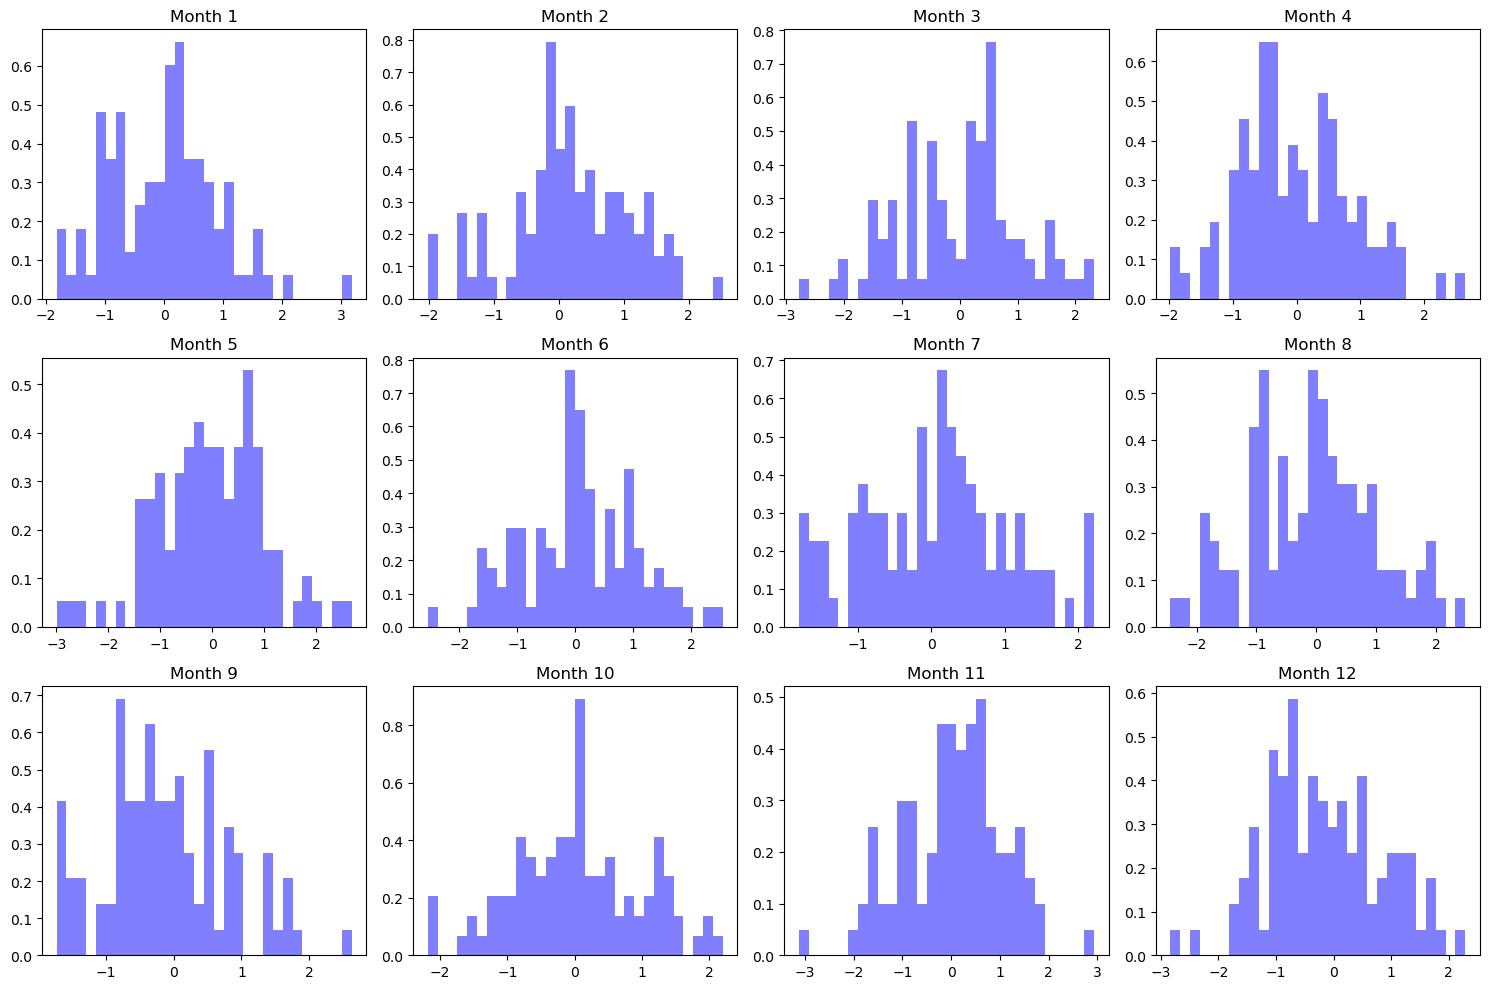

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
np.random.seed(0)
data = np.random.randn(1000)

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # Adjust figsize as needed

months = range(1, 13)
for i, ax in enumerate(axes.flatten()):
    month_data = np.random.randn(100)  # Replace with your actual data for each month
    ax.hist(month_data, bins=30, density=True, alpha=0.5, color='b')
    ax.set_title(f'Month {months[i]}')  # Set month labels
    
plt.tight_layout()  # Adjust subplot parameters to give specified padding

# Save plots as TIFF files
for i, month in enumerate(months):
    plt.savefig(f'monthly_plot_{month}.tiff', dpi=300, format='tiff')  # Save as TIFF format with 300 dpi

plt.show()


/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


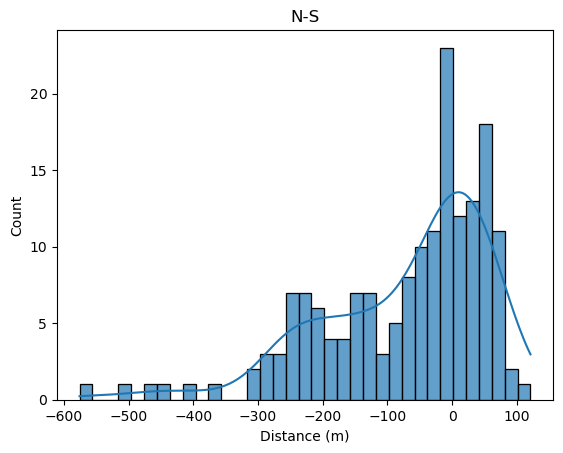

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


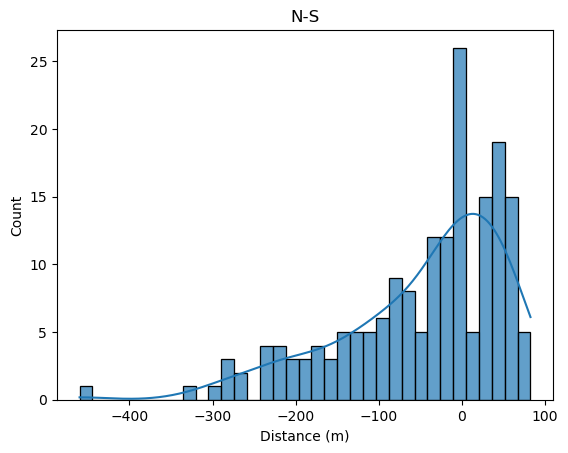

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


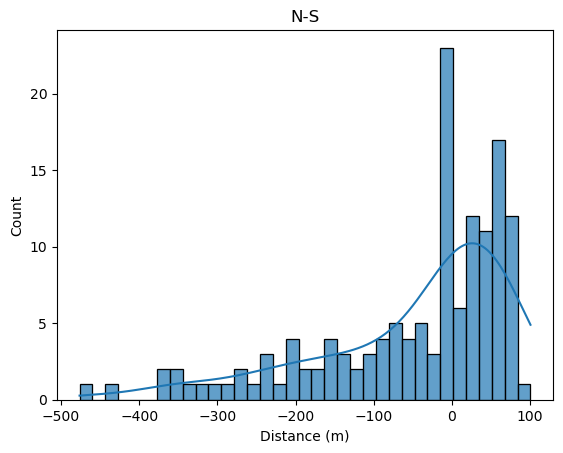

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


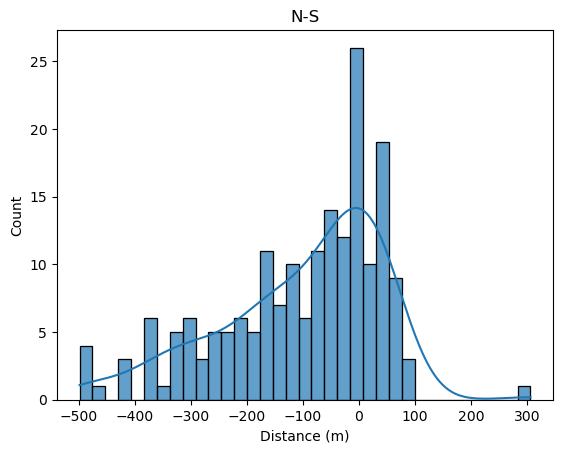

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


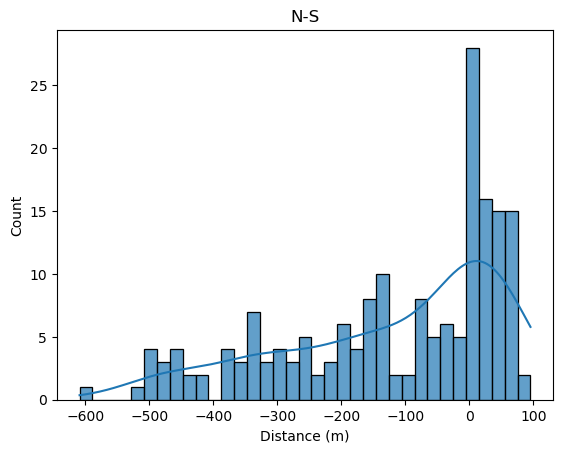

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


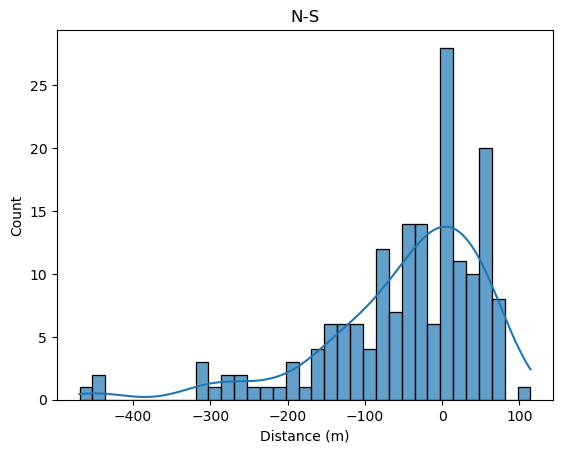

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


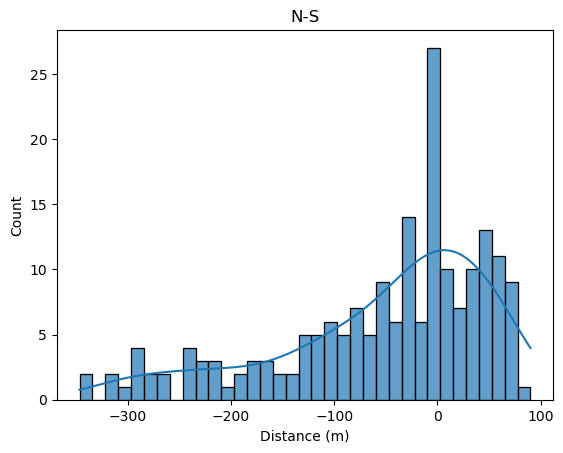

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


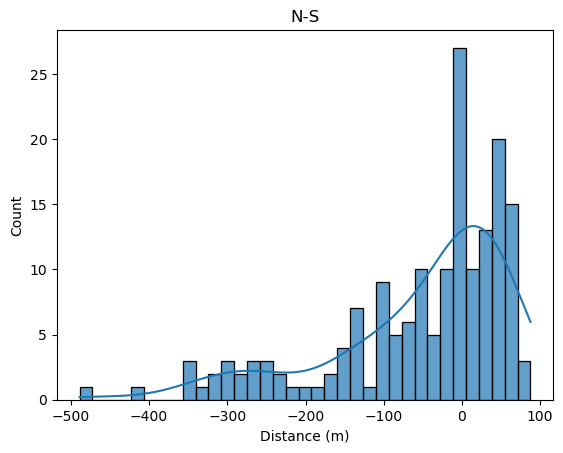

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


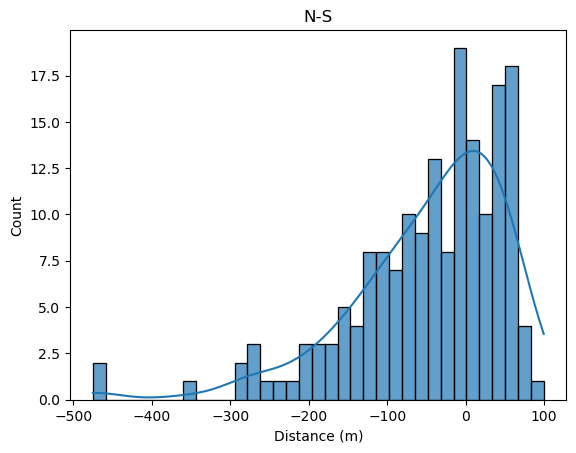

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


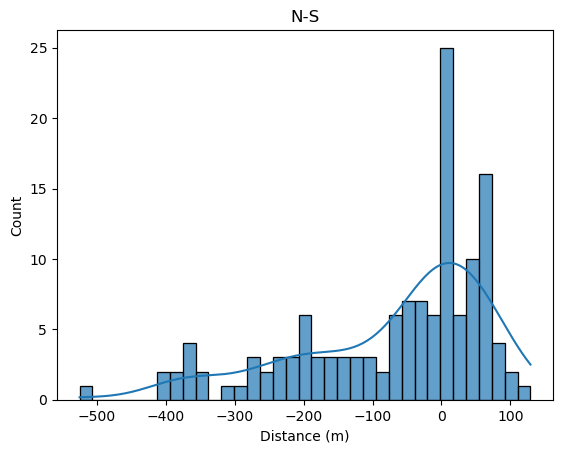

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


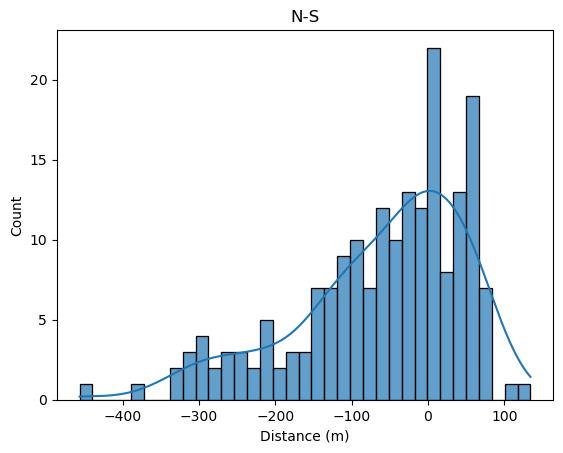

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


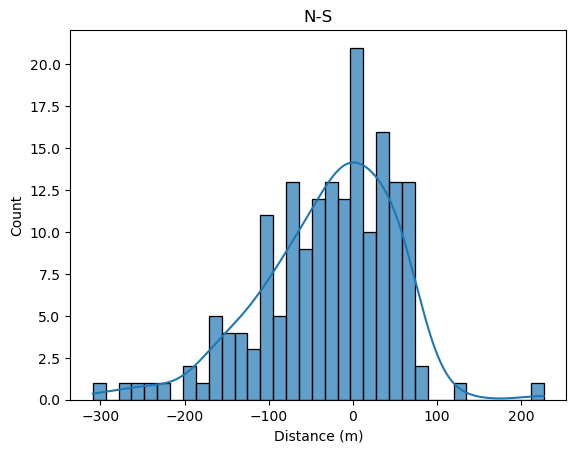

In [49]:
df_mon_x = df_soc_x.groupby(df_soc_x['date'].dt.month)

for mon in df_soc_x['date'].dt.month.unique():
    df_ = df_mon_x.get_group(mon)
    # plt.scatter(df_['cluster_Centers'], np.zeros(len(df_['cluster_Centers'])), s=2)
    sns.histplot(df_['cluster_Centers'], bins=35, edgecolor='black', alpha=0.7, kde=True)
    plt.title('N-S')
    plt.xlabel('Distance (m)')
    # plt.savefig(f'{calendar.month_name[mon]}_NS.png')
    plt.savefig(f'{calendar.month_name[mon]}_NS.jpeg', dpi=300, format='jpeg')
    plt.show()